# Analysis of the Root Network votes

The goal of this notebook is to have a better understanding of who is part of how the root network distributes their weights / votes. (the TAO emissions)

There are three ways to look at this: 
- looking at how each validator weight every subnets across time
- looking at how each subnet is weighted by every validators across time
- looking at how each validator weight each subnet at a certain block

I will start by looking at how the biggest validators set their weights individually. 


In [34]:
import bittensor as bt
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
from substrateinterface import SubstrateInterface

In [35]:
# load bittensor data
subtensor = bt.subtensor('archive')
root_metagraph = bt.metagraph(netuid=0, lite=False)

# get lateste block
substrate = SubstrateInterface(url="wss://archive.chain.opentensor.ai:443/")
block = substrate.get_block()['header']['number']
print(block)

2024-06-19 13:13:55.712 |     WARNING      |  - We strongly encourage running a local subtensor node whenever possible. This increases decentralization and resilience of the network. - 
2024-06-19 13:13:55.714 |     WARNING      |  - In a future release, local subtensor will become the default endpoint. To get ahead of this change, please run a local subtensor node and point to it. - 
3212231


In [36]:
W = root_metagraph.W.float()
weights_matrix = pd.DataFrame(W.numpy())
new_column_names = [f'SN{i}' for i in range(len(weights_matrix.columns))]
weights_matrix.columns = new_column_names
weights_matrix['weights sum'] = weights_matrix.sum(axis=1)

In [37]:
step = 7200
period_in_days = 30
blocks = range(block - step*period_in_days, block, 7200)
today = datetime.today().date()
start_date = (today - relativedelta(days=period_in_days)).strftime('%d-%m-%Y')
today = today.strftime('%d-%m-%Y')
days_since_start = 0
print(today, block, blocks)

19-06-2024 3212231 range(2996231, 3212231, 7200)


In [38]:
# list subnet 0 hotkeys
hotkeys = root_metagraph.hotkeys
hotkeys = pd.DataFrame(hotkeys, columns=['hotkeys'])
stakes = pd.DataFrame((root_metagraph.stake.float()).numpy(), columns=['stakes'])
stakes_by_hotkey = pd.concat([hotkeys, stakes], axis=1)
stakes_by_hotkey['stakes'] = (stakes_by_hotkey['stakes'] / stakes_by_hotkey['stakes'].sum())*100

# filter out those with less than 1% of stake
stakes_by_hotkey = stakes_by_hotkey[stakes_by_hotkey['stakes'] > 1]
stakes_by_hotkey = stakes_by_hotkey.sort_values('stakes', ascending=False)
uid_sn0 = []
for i in stakes_by_hotkey['hotkeys']:
    uid_sn0.append(subtensor.get_uid_for_hotkey_on_subnet(i, 0))
stakes_by_hotkey['uid_sn0'] = uid_sn0

In [39]:
# defining hotkey of the biggest validators
opentensor = '5F4tQyWrhfGVcNhoqeiNsR6KjD4wMZ2kfhLj4oHYuyHbZAc3'
taostats = '5Hddm3iBFD2GLT5ik7LZnT3XJUnRnN8PoeCFgGQgawUVKNm8'
foundry = '5HEo565WAy4Dbq3Sv271SAi7syBSofyfhhwRNjFNSM2gP9M2'
bittensorGuru = '5HK5tp6t2S59DywmHRWPBVJeJ86T61KjurYqeooqj8sREpeN'
roundTable21 = '5FFApaS75bv5pJHfAp2FVLBj9ZaXuFDjEypsaBNc1wCfe52v'
datura = '5FKstHjZkh4v3qAMSBa1oJcHCLjxYZ8SNTSz1opTv4hR7gVB'
tao_validator = '5EhvL1FVkQPpMjZX4MAADcW42i3xPSF1KiCpuaxTYVr28sux'
firstTensor = '5DvTpiniW9s3APmHRYn8FroUWyfnLtrsid5Mtn5EwMXHN2ed'
tensorplex = '5HbLYXUBy1snPR8nfioQ7GoA9x76EELzEq9j7F32vWUQHm1x'
owl_ventures = '5CsvRJXuR955WojnGMdok1hbhffZyB4N5ocrv82f3p5A2zVp'


In [40]:
def getRootWeights(hotkey, block):
    # weights for all hotkeys
    weights = subtensor.weights(0, block=block)
    # Convert the list to a dictionary
    weights_dict = {key: value for key, value in weights}

    # weights for one hotkey
    weights_for_hotkey = weights_dict[subtensor.get_uid_for_hotkey_on_subnet(hotkey, 0)]
    weights_for_hotkey_dict = {key: value for key, value in weights_for_hotkey}
    return weights_for_hotkey_dict

In [41]:
def plot_weights_share(data, validatorName, validator):
    data['weights_share'].plot(kind='barh', color='#212278')

    # Add a title
    plt.title('Root Weights Share, ' + str(today))
    plt.suptitle(validatorName + ': ' + validator, fontsize=10)

    # Show the plot
    plt.show()

def plot_weights_share_specific_date(data, validatorName, validator):
    data['weights_share'].plot(kind='barh', color='#212278')

    # Add a title
    plt.title('Root Weights Share, ' + '12-06-2024')
    plt.suptitle(validatorName + ': ' + validator, fontsize=10)

    # Show the plot
    plt.show()

In [42]:
weights_otf = getRootWeights(opentensor, block)
weights_otf_df = pd.DataFrame.from_dict(weights_otf, orient='index', columns=['Weights'])
weights_otf_df['weights_share'] = (weights_otf_df['Weights'] / weights_otf_df['Weights'].sum())
weights_otf_df.index.name = 'Subnets'

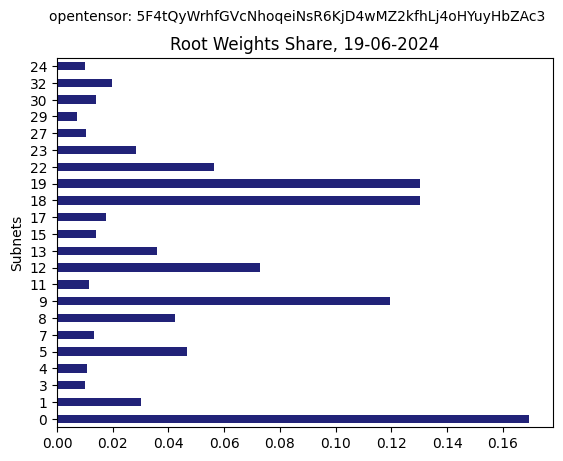

In [64]:
plot_weights_share(weights_otf_df, 'opentensor', opentensor)

In [44]:
weights_taostats = getRootWeights(taostats, block)
weights_taostats_df = pd.DataFrame.from_dict(weights_taostats, orient='index', columns=['Weights'])
weights_taostats_df['weights_share'] = (weights_taostats_df['Weights'] / weights_taostats_df['Weights'].sum())
weights_taostats_df.index.name = 'Subnets'

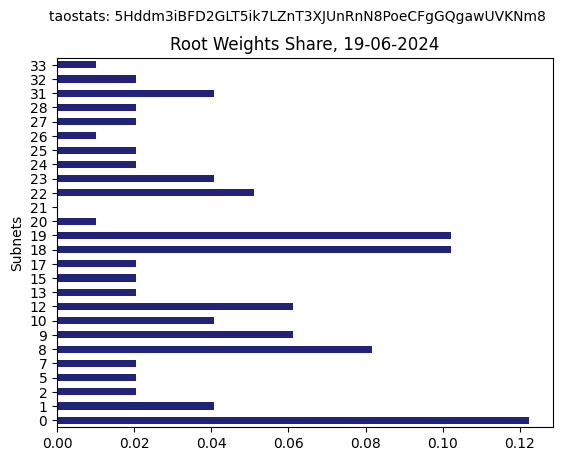

In [45]:
plot_weights_share(weights_taostats_df, 'taostats', taostats)

In [46]:
weights_foundry = getRootWeights(foundry, block)
weights_foundry_df = pd.DataFrame.from_dict(weights_foundry, orient='index', columns=['Weights'])
weights_foundry_df['weights_share'] = (weights_foundry_df['Weights'] / weights_foundry_df['Weights'].sum())
weights_foundry_df.index.name = 'Subnets'

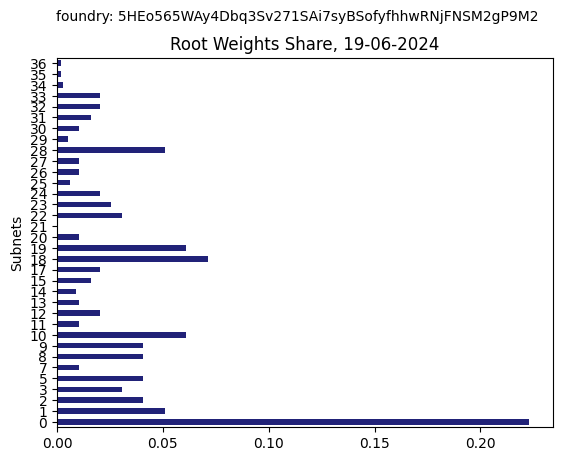

In [47]:
plot_weights_share(weights_foundry_df, 'foundry', foundry)

In [48]:
weights_bittensorGuru = getRootWeights(bittensorGuru, block)
weights_bittensorGuru_df = pd.DataFrame.from_dict(weights_bittensorGuru, orient='index', columns=['Weights'])
weights_bittensorGuru_df['weights_share'] = (weights_bittensorGuru_df['Weights'] / weights_bittensorGuru_df['Weights'].sum())
weights_bittensorGuru_df.index.name = 'Subnets'

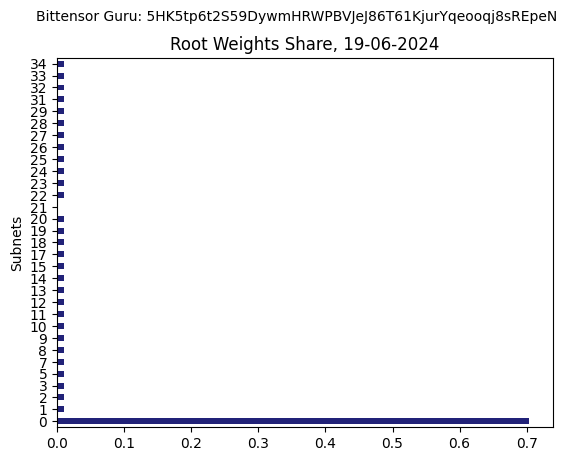

In [49]:
plot_weights_share(weights_bittensorGuru_df, 'Bittensor Guru', bittensorGuru)

In [50]:
weights_roundtable21 = getRootWeights(roundTable21, block)
weights_roundtable21 = pd.DataFrame.from_dict(weights_roundtable21, orient='index', columns=['Weights'])
weights_roundtable21['weights_share'] = (weights_roundtable21['Weights'] / weights_roundtable21['Weights'].sum())
weights_roundtable21.index.name = 'Subnets'

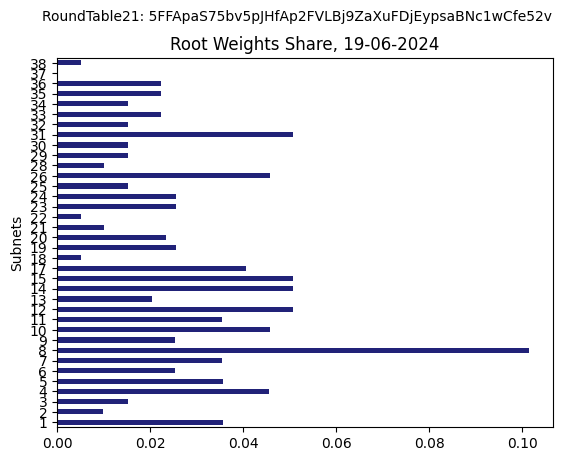

In [51]:
plot_weights_share(weights_roundtable21, 'RoundTable21', roundTable21)

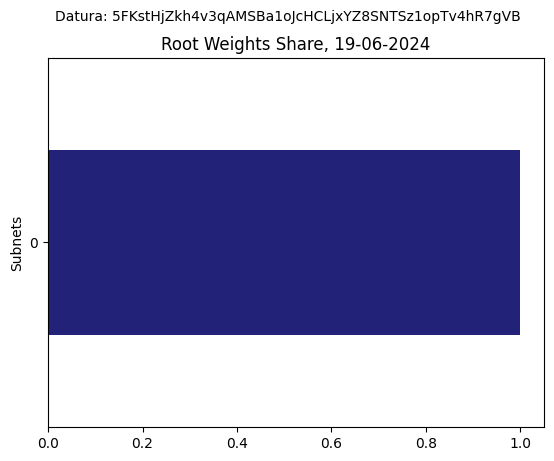

In [52]:
weights_datura = getRootWeights(datura, block)
weights_datura_df = pd.DataFrame.from_dict(weights_datura, orient='index', columns=['Weights'])
weights_datura_df['weights_share'] = (weights_datura_df['Weights'] / weights_datura_df['Weights'].sum())
weights_datura_df.index.name = 'Subnets'
plot_weights_share(weights_datura_df, 'Datura', datura)

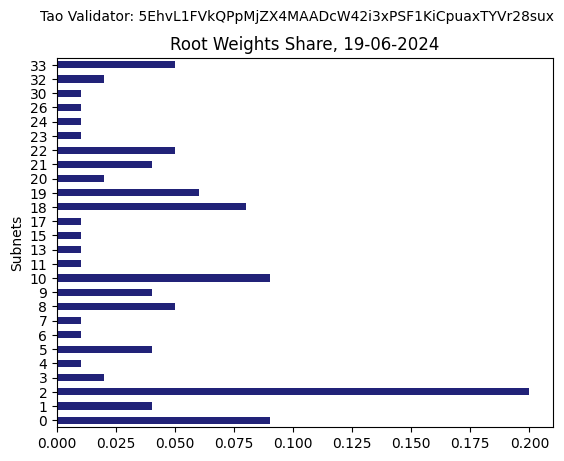

In [53]:
weights_tao_validator = getRootWeights(tao_validator, block)
weights_tao_validator_df = pd.DataFrame.from_dict(weights_tao_validator, orient='index', columns=['Weights'])
weights_tao_validator_df['weights_share'] = (weights_tao_validator_df['Weights'] / weights_tao_validator_df['Weights'].sum())
weights_tao_validator_df.index.name = 'Subnets'
plot_weights_share(weights_tao_validator_df, 'Tao Validator', tao_validator)

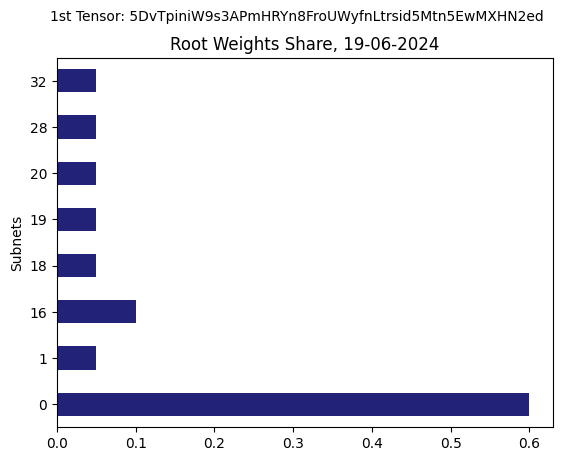

In [54]:
weights_firstTensor = getRootWeights(firstTensor, block)
weights_firstTensor_df = pd.DataFrame.from_dict(weights_firstTensor, orient='index', columns=['Weights'])
weights_firstTensor_df['weights_share'] = (weights_firstTensor_df['Weights'] / weights_firstTensor_df['Weights'].sum())
weights_firstTensor_df.index.name = 'Subnets'
plot_weights_share(weights_firstTensor_df, '1st Tensor', firstTensor)

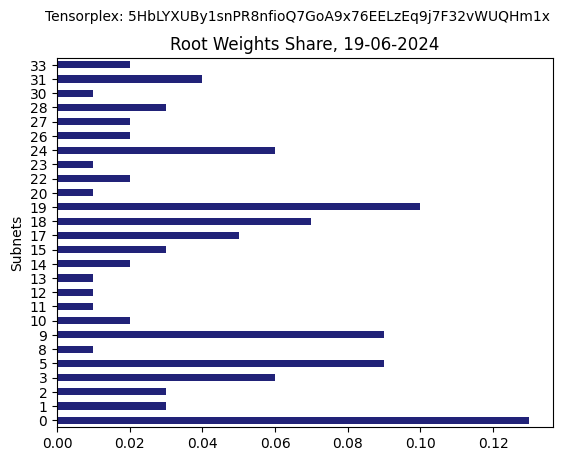

In [55]:
weights_tensorplex = getRootWeights(tensorplex, block)
weights_tensorplex_df = pd.DataFrame.from_dict(weights_tensorplex, orient='index', columns=['Weights'])
weights_tensorplex_df['weights_share'] = (weights_tensorplex_df['Weights'] / weights_tensorplex_df['Weights'].sum())
weights_tensorplex_df.index.name = 'Subnets'
plot_weights_share(weights_tensorplex_df, 'Tensorplex', tensorplex)

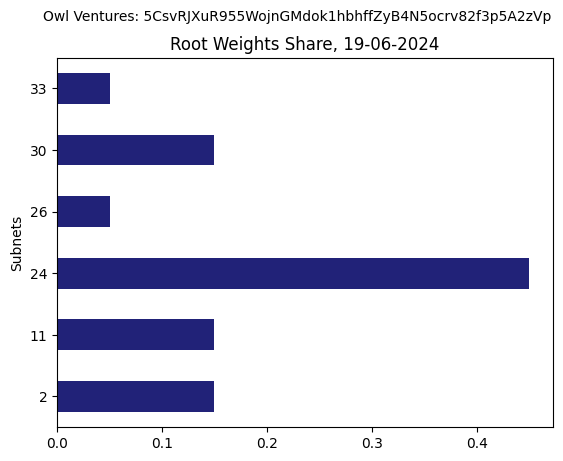

In [56]:
weights_owl_ventures = getRootWeights(owl_ventures, block)
weights_owl_ventures_df = pd.DataFrame.from_dict(weights_owl_ventures, orient='index', columns=['Weights'])
weights_owl_ventures_df['weights_share'] = (weights_owl_ventures_df['Weights'] / weights_owl_ventures_df['Weights'].sum())
weights_owl_ventures_df.index.name = 'Subnets'
plot_weights_share(weights_owl_ventures_df, 'Owl Ventures', owl_ventures)

### Adding historical values
At this point, I can get the weights for any hotkey at any block. Now, I want to get this value historically, and plot a graph line like we do for emissions. <br>

**Tried this but the result was too messy.**

Here is what I tried instead: 

### Change of weights between two periods, as a % of total weights
Reasoning: <br><br>
At the beginning, I juste wanted to show the evolution in weights assigned. <br>

But one weight doesn't correspond to anything: it *looks like* validators have as much weights as they want, and some validators with more TAO delegated have more weights than other with more TAO delegated. <br>

These plots show the change in weight% assigned to subnets by a validator. 

In [57]:
def plot_bar_chart(data, subtitle):
    data.plot(kind='bar', color='#F4733C')
    plt.title('Change of weights as % of total, past ' + str(period_in_days) + ' days')
    plt.suptitle(subtitle, fontsize=8)

In [58]:
# this function computes the weights added or removed from subnets by a validator, 
# as a percentage of the total weights they assign
def get_weights_change(validator, block):
    weights_end = getRootWeights(validator, block)
    weights_start = getRootWeights(validator, block - period_in_days*step)

    weights_empty = {i: 0 for i in range(0, 39)}
    for key, value in weights_empty.items():
        if key not in weights_end:
            weights_end[key] = value
        if key not in weights_start:
            weights_start[key] = value

    weights_end = dict(sorted(weights_end.items()))
    weights_start = dict(sorted(weights_start.items()))

    weights_change = {key: weights_end[key] - weights_start[key] for key in weights_start}
    # here, we transform the raw values to % of total weights
    weights_change = {key: (value / sum(weights_end.values()) ) for key, value in weights_change.items() if value != 0}
    weights_change_df = pd.DataFrame.from_dict(weights_change, orient='index', columns=['Weights Change'])
    weights_change_df.index.name = 'Subnets'

    return weights_change_df

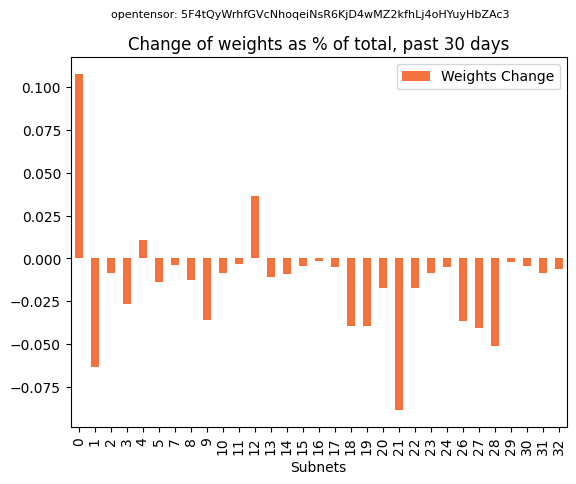

In [59]:
weights_diff = get_weights_change(opentensor, block)
plot_bar_chart(weights_diff, 'opentensor: ' + opentensor)

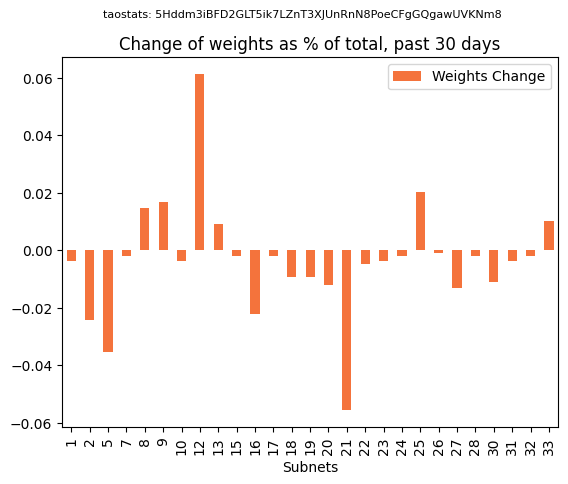

In [60]:
weights_diff = get_weights_change(taostats, block)
plot_bar_chart(weights_diff, 'taostats: ' + taostats)

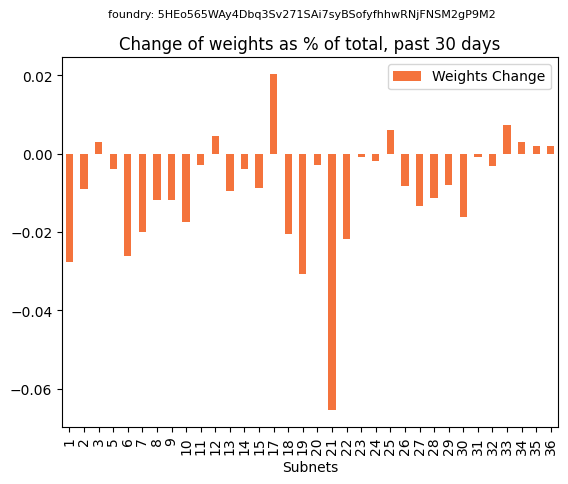

In [61]:
weights_diff = get_weights_change(foundry, block)
plot_bar_chart(weights_diff, 'foundry: ' + foundry)

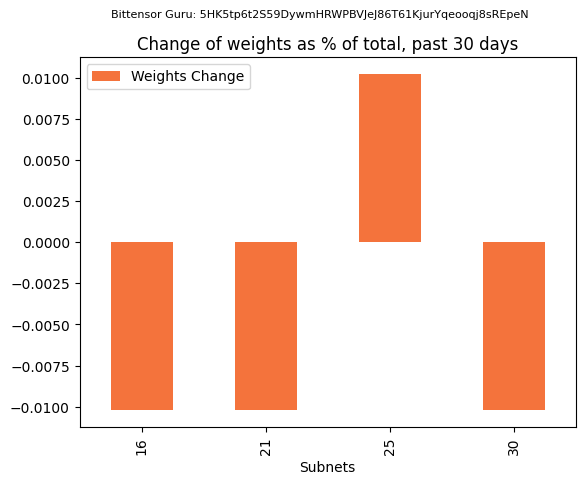

In [62]:
weights_diff = get_weights_change(bittensorGuru, block)
plot_bar_chart(weights_diff, 'Bittensor Guru: ' + bittensorGuru)

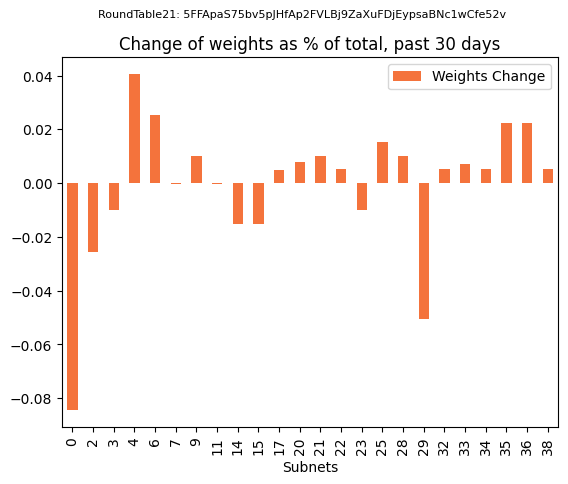

In [63]:
weights_diff = get_weights_change(roundTable21, block)
plot_bar_chart(weights_diff, 'RoundTable21: ' + roundTable21)